In [1]:
import time

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from FNN_single_layer_parameterized import SimpleNN, generate_linearly_separable_data
from circuits import forward_propagation_partial
from utils import test_accuracy, plot_decision_boundary

In [34]:
dim_list = []
forward_ad_times = []
full_forward_ad_times = []
reverse_ad_times = []
full_reverse_ad_times = []
for dimensions in [*range(2, 10), 15, 20, 40, 100]:
    print(f"Training with {dimensions} dimensions")
    dim_list.append(dimensions)
    X, y = generate_linearly_separable_data(50, dimensions, separation=1, noise=0.5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    nn = SimpleNN(dimensions, 1)
    
    gradients3_total = 0
    gradients4_total = 0
    
    full_forward_ad = 0
    full_reverse_ad = 0
    
    start_time = time.time()
    accuracy = 0
    epoch = 0
    max_epochs = 100
    
    
    while epoch < max_epochs:
        start = time.time()
        nn.reset_timer()
        gradients3 = nn.backpropagation_with_forward_AD(X_train, y_train)
        gradients3_total += nn.get_timer()
        full_forward_ad += time.time() - start
    
        start = time.time()
        nn.reset_timer()
        gradients4 = nn.backpropagation_with_reverse_AD(X_train, y_train)
        gradients4_total += nn.get_timer()
        full_reverse_ad += time.time() - start
    
        nn.update_weights(gradients4, lr=0.01)
        
        if epoch % 100 == 0:
            y_pred_test = nn.forward(X_test)
            accuracy = test_accuracy(y_test, y_pred_test)
            print(f"Epoch {epoch}: Test accuracy = {accuracy:.2f}")
    
        epoch += 1
    
    backprop_time = time.time() - start_time
    print(f"Forward AD took {gradients3_total:.5f} seconds")
    print(f"Reverse AD took {gradients4_total:.5f} seconds")
    forward_ad_times.append(gradients3_total)
    reverse_ad_times.append(gradients4_total)
    
    full_forward_ad_times.append(full_forward_ad)
    full_reverse_ad_times.append(full_reverse_ad)
    

Training with 2 dimensions
Epoch 0: Test accuracy = 0.10
Forward AD took 0.12657 seconds
Reverse AD took 0.09715 seconds
Training with 3 dimensions
Epoch 0: Test accuracy = 0.40
Forward AD took 0.23853 seconds
Reverse AD took 0.17380 seconds
Training with 4 dimensions
Epoch 0: Test accuracy = 0.45
Forward AD took 0.39422 seconds
Reverse AD took 0.26739 seconds
Training with 5 dimensions
Epoch 0: Test accuracy = 0.35
Forward AD took 0.41084 seconds
Reverse AD took 0.28083 seconds
Training with 6 dimensions
Epoch 0: Test accuracy = 0.90
Forward AD took 0.53092 seconds
Reverse AD took 0.35449 seconds
Training with 7 dimensions
Epoch 0: Test accuracy = 0.85
Forward AD took 0.67844 seconds
Reverse AD took 0.44080 seconds
Training with 8 dimensions
Epoch 0: Test accuracy = 0.90
Forward AD took 0.86192 seconds
Reverse AD took 0.55278 seconds
Training with 9 dimensions
Epoch 0: Test accuracy = 0.25
Forward AD took 1.05537 seconds
Reverse AD took 0.66904 seconds
Training with 15 dimensions
Epoc

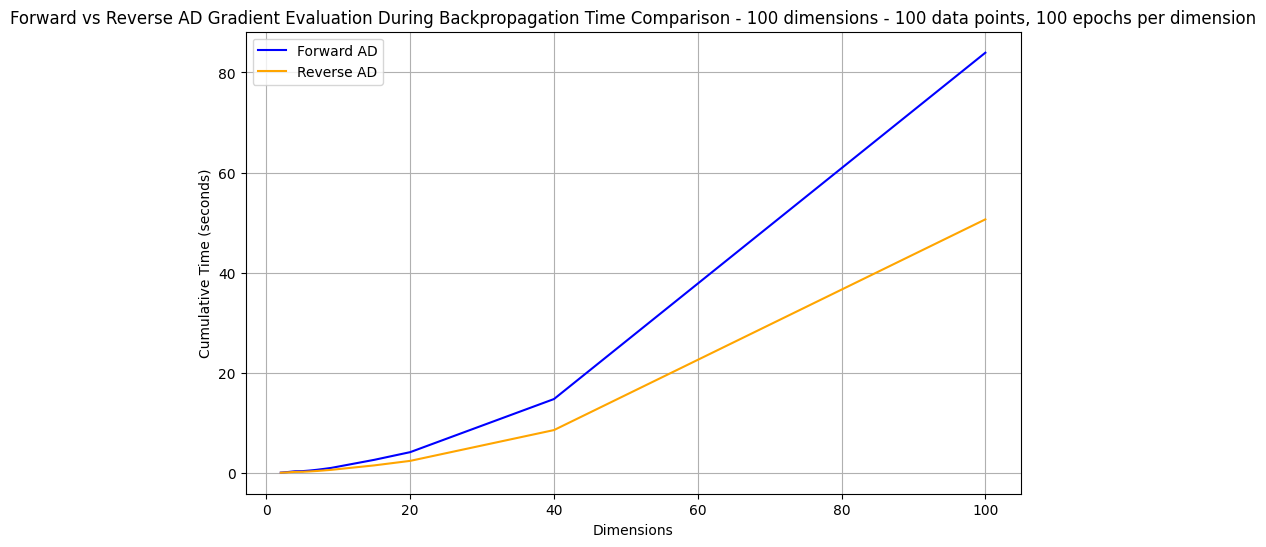

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(dim_list, forward_ad_times, label="Forward AD", color="blue")
plt.plot(dim_list, reverse_ad_times, label="Reverse AD", color="orange")
plt.title("Forward vs Reverse AD Gradient Evaluation During Backpropagation Time Comparison - 100 dimensions - 100 data points, 100 epochs per dimension")
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Time (seconds)")
plt.legend()
plt.grid()
plt.show()

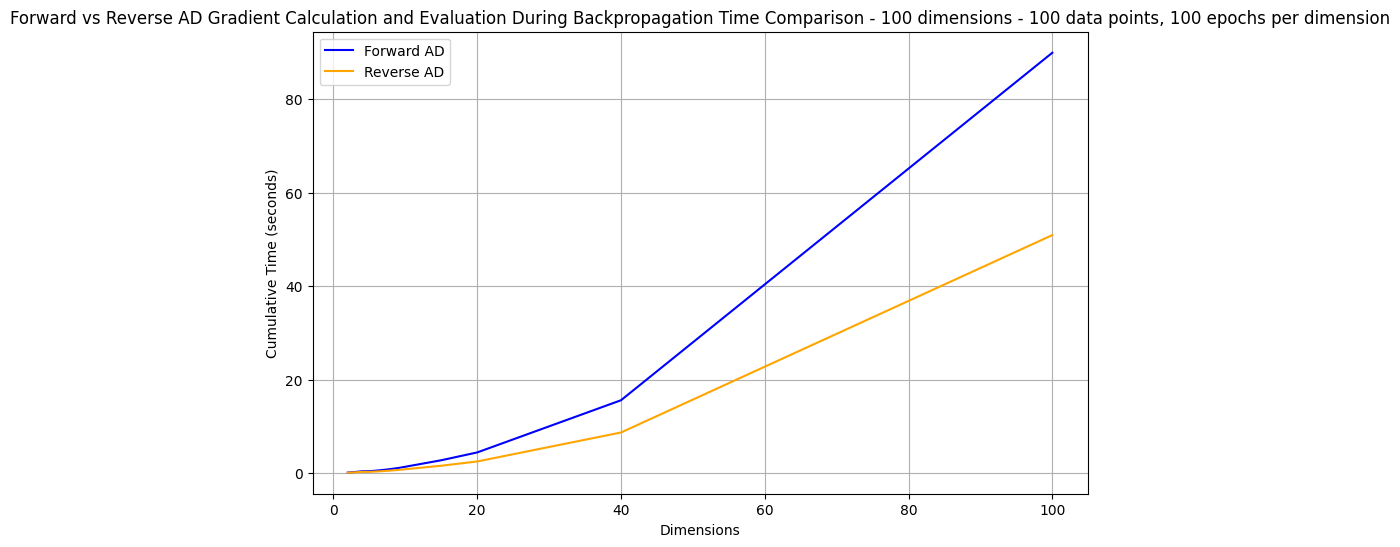

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(dim_list, full_forward_ad_times, label="Forward AD", color="blue")
plt.plot(dim_list, full_reverse_ad_times, label="Reverse AD", color="orange")
plt.title("Forward vs Reverse AD Gradient Calculation and Evaluation During Backpropagation Time Comparison - 100 dimensions - 100 data points, 100 epochs per dimension")
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Time (seconds)")
plt.legend()
plt.grid()
plt.show()

In [23]:
from circuits import back_propagation_partial

dim_list = []
forward_partial_size_list = []
reverse_partial_size_list = []

for dimensions in [*range(2, 10), 15, 20, 40, *range(100, 2000, 100)]:
    dim_list.append(dimensions)
    nn = SimpleNN(dimensions, 1)
    inputs, outputs, weights_1, biases_1 = nn.get_inputs_weights_biases()
    s_sigmoid_loss = nn.get_output_equation()
    
    # forward
    partials = [forward_propagation_partial(s_sigmoid_loss, weights_1[i]) for i in range(nn.input_size)]
    partials += [forward_propagation_partial(s_sigmoid_loss, biases_1[0])]
    forward_partials_size = sum(partial.get_size() for partial in partials)
    forward_partial_size_list.append(forward_partials_size)
    
    # reverse
    partials_object = back_propagation_partial(s_sigmoid_loss)
    partials = [partials_object.get_derivative(i) for i in [*weights_1, *biases_1]]
    reverse_partials_size = sum(partial.get_size() for partial in partials)
    reverse_partial_size_list.append(reverse_partials_size)
    print("Done with", dimensions)

Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8
Done with 9
Done with 15
Done with 20
Done with 40
Done with 100
Done with 200
Done with 300
Done with 400
Done with 500
Done with 600
Done with 700
Done with 800
Done with 900
Done with 1000
Done with 1100
Done with 1200
Done with 1300
Done with 1400
Done with 1500
Done with 1600
Done with 1700
Done with 1800
Done with 1900


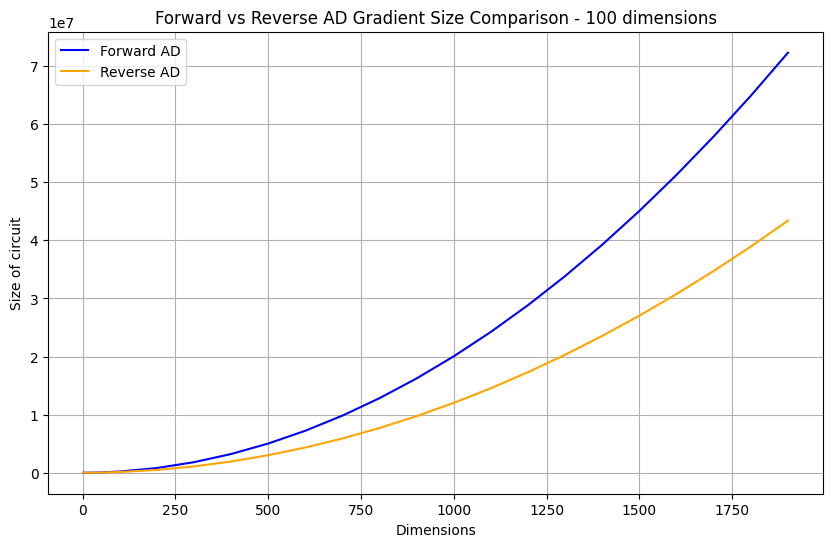

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(dim_list, forward_partial_size_list, label="Forward AD", color="blue")
plt.plot(dim_list, reverse_partial_size_list, label="Reverse AD", color="orange")
plt.title("Forward vs Reverse AD Gradient Size Comparison - 100 dimensions")
plt.xlabel("Dimensions")
plt.ylabel("Size of circuit")
plt.legend()
plt.grid()
plt.show()

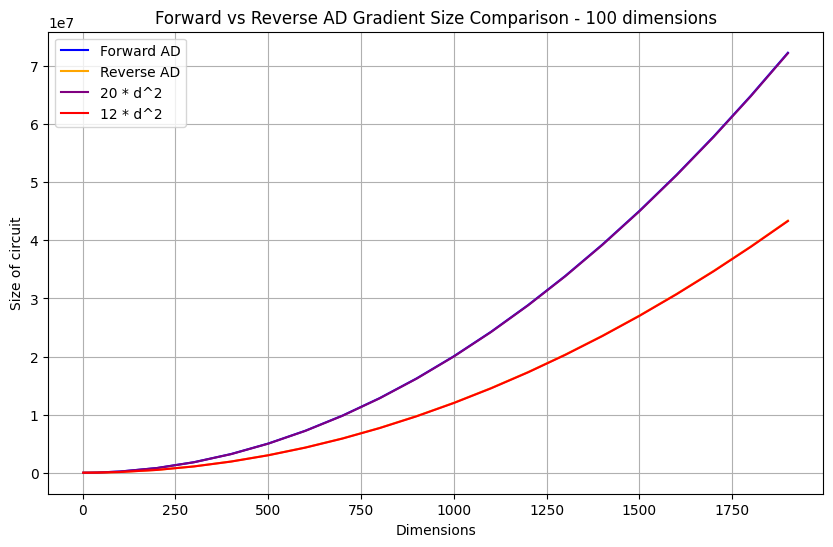

In [25]:

plt.figure(figsize=(10, 6))
plt.plot(dim_list, forward_partial_size_list, label="Forward AD", color="blue")
plt.plot(dim_list, reverse_partial_size_list, label="Reverse AD", color="orange")
# plot just dim_list squared
plt.plot(dim_list, [20*dim**2 for dim in dim_list], label="20 * d^2", color="purple")
plt.plot(dim_list, [12*dim**2 for dim in dim_list], label="12 * d^2", color="red")
plt.title("Forward vs Reverse AD Gradient Size Comparison - 100 dimensions")
plt.xlabel("Dimensions")
plt.ylabel("Size of circuit")
plt.legend()
plt.grid()
plt.show()